<a href="https://colab.research.google.com/github/uditmanav17/DL-with-Python/blob/master/Chapter_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Maths of Neural Net

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical

## 2.1: Loading MNIST dataset in Keras

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(f"train_images.shape - {train_images.shape}")
print(f"train_labels.shape - {train_labels.shape}")
print(f"test_images.shape - {test_images.shape}")
print(f"test_labels.shape - {test_labels.shape}")

train_images.shape - (60000, 28, 28)
train_labels.shape - (60000,)
test_images.shape - (10000, 28, 28)
test_labels.shape - (10000,)


In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
#sequential way to create a model, piecewise
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
#sequential way to create a model, full
network = models.Sequential([
                             layers.Dense(512, 
                                          activation='relu', 
                                          input_shape=(28 * 28,)), 
                             layers.Dense(10, 
                                          activation='softmax')
])
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
#functional way to create a model, always piecewise
l1 = layers.Input(shape=(28*28, ))
l2 = layers.Dense(512, activation='relu')(l1)
l2 = layers.Dense(10, activation='softmax')(l2)
model = models.Model(inputs=l1, outputs=l2)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


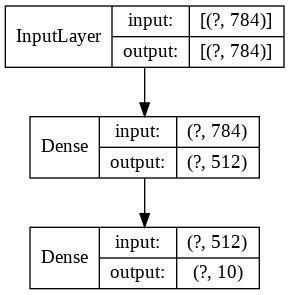

In [0]:
tf.keras.utils.plot_model(
    network, to_file='model.png', show_shapes=True, show_layer_names=False,
    rankdir='TB', expand_nested=True, dpi=96
)

In [0]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# We also need to categorically encode the labels, a step that’s explained in chapter 3.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2570 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1024 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0688 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0493 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0377 - accuracy: 0.9888


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9805
test_acc: 0.9804999828338623


In [0]:
!python --version

Python 3.6.9


In [0]:
# Scalars (0D tensors)
x = np.array(12)
print(x)
print(x.ndim)

12
0


In [0]:
# Vectors (1D tensors)
x = np.array([12, 3, 4, 5])
print(x)
print(x.ndim)

[12  3  4  5]
1


In [0]:
# Matrices (2D tensors)
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2


In [0]:
# 3D tensors and higher-dimensional tensors
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3


(28, 28)


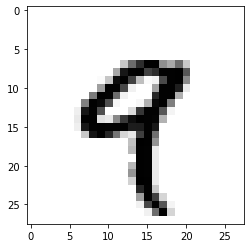

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
print(digit.shape)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
my_slice = train_images[10:100] # equivalent to train_images[10:100, :, :] or train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


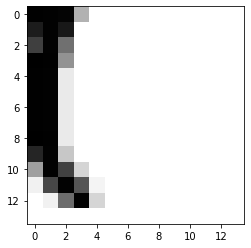

In [0]:
plt.imshow(train_images[4, 14:, 14:], cmap=plt.cm.binary)

In [0]:
x = np.array([2, 3]) + np.array([2])
print(x.shape, type(x))
print(x)

(2,) <class 'numpy.ndarray'>
[4 5]


In [0]:
x = np.array(range(6), dtype=np.float32).reshape((3, 2))
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)

In [0]:
x.reshape((1, 6))

array([[0., 1., 2., 3., 4., 5.]], dtype=float32)

In [0]:
x.shape

(3, 2)

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

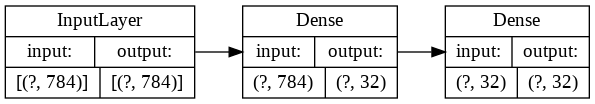

In [0]:
tf.keras.utils.plot_model(
    model, 
    # to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False,
    rankdir='LR', # LR TB
    expand_nested=True, 
    dpi=96
)

# Chapter 3: Getting started with NN

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


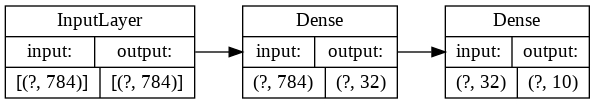

In [0]:
# Sequential API
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())
tf.keras.utils.plot_model(
    model, 
    # to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False,
    rankdir='LR', # LR TB
    expand_nested=True, 
    dpi=96
)

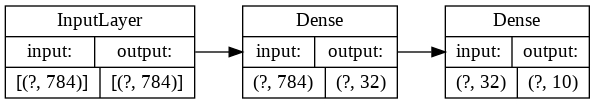

In [0]:
# functional API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
tf.keras.utils.plot_model(
    model, 
    # to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False,
    rankdir='LR', # LR TB
    expand_nested=True, 
    dpi=96
)

## 3.4: Classifying movie reviews: a binary classification example


IMDB dataset has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. 

In [0]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [0]:
print(train_data[0])
print(len(train_data[0]))
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
1


For kicks, here’s how you can quickly decode one of these reviews back to English words:
```Python
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Decodes the review. 
# Note that the indices are offset by 3 because 0, 1, and 2 are
# reserved indices for “padding,” “start of
# sequence,” and “unknown.”
```

In [0]:
# decoding first review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

### 3.4.2 Preparing Data
You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:
* **Pad your lists** so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).
* **One-hot** encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.
Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.

In [0]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


### 3.4.3 Building Ntework

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

You’re passing your optimizer, loss function, and metrics as strings, which is possible because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function. 

In [0]:
# another way to compile model
from tensorflow.keras import optimizers, losses, metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

### 3.4.4 Validating approach

In [0]:
# validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# training with train and validation data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5149 - binary_accuracy: 0.7819 - val_loss: 0.3786 - val_binary_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2919 - binary_accuracy: 0.9032 - val_loss: 0.3195 - val_binary_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2162 - binary_accuracy: 0.9261 - val_loss: 0.3014 - val_binary_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1669 - binary_accuracy: 0.9463 - val_loss: 0.2992 - val_binary_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1300 - binary_accuracy: 0.9597 - val_loss: 0.2911 - val_binary_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1136 - binary_accuracy: 0.9620 - val_loss: 0.3155 - val_binary_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

In [0]:
print(history)
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [0]:
print(history_dict)

{'loss': [0.514926552772522, 0.29188019037246704, 0.21621964871883392, 0.16687588393688202, 0.13001854717731476, 0.11363185942173004, 0.09425733238458633, 0.07631728798151016, 0.06271518021821976, 0.050050392746925354, 0.04357530549168587, 0.03156124800443649, 0.028880834579467773, 0.023377766832709312, 0.019846664741635323, 0.014327718876302242, 0.008881201036274433, 0.009182359091937542, 0.009523320943117142, 0.003555469447746873], 'binary_accuracy': [0.7819333076477051, 0.9031999707221985, 0.9260666370391846, 0.9462666511535645, 0.9596666693687439, 0.9620000123977661, 0.9718666672706604, 0.9769999980926514, 0.9821333289146423, 0.9869999885559082, 0.9896000027656555, 0.9931333065032959, 0.9937999844551086, 0.9950666427612305, 0.9952666759490967, 0.9976000189781189, 0.9995333552360535, 0.9988666772842407, 0.9976666569709778, 0.9998666644096375], 'val_loss': [0.3786444067955017, 0.319524884223938, 0.30143114924430847, 0.2992081940174103, 0.2911285161972046, 0.315538227558136, 0.3645297

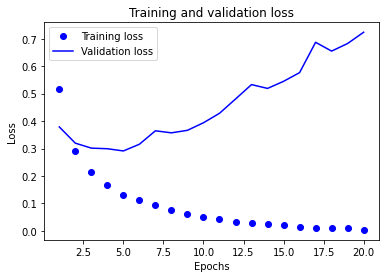

In [0]:
# plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

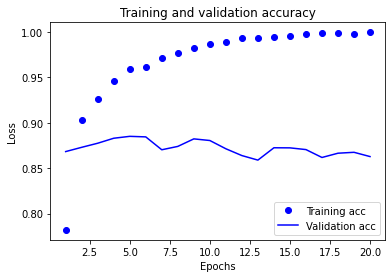

In [0]:
# plotting training and validation accuracy
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize
to data outside of the training set. <br>
In this case, to prevent overfitting, you could stop training after three epochs. In general, you can use a range of techniques to mitigate overfitting.
Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 24ms/step - loss: 0.4426 - accuracy: 0.8316
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2587 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.1978 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.8815
[0.30123022198677063, 0.8814799785614014]


### 3.4.5 Generate Predictions

In [0]:
preds = model.predict(x_test)
print(preds)

[[0.2411753 ]
 [0.999912  ]
 [0.96983546]
 ...
 [0.16105926]
 [0.11431965]
 [0.6751374 ]]


In [0]:
preds>0.5

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

### 3.4.6 Some Experiments
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
* You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the mse loss function instead of binary_crossentropy.
* Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

### 3.4.7 Wrapping Up
Here’s what you should take away from this example:
* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options, too.
* Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
* In a binary classification problem (two output classes), your network should
end with a Dense layer with one unit and a sigmoid activation: the output of
your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.
* The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

## 3.5: Classifying newswires: a multiclass classification example
In this section, you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification. <br>
If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

In [0]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print(f"train_data.shape - {train_data.shape}")
print(f"train_labels.shape - {train_labels.shape}")
print(f"test_data.shape - {test_data.shape}")
print(f"test_labels.shape - {test_labels.shape}")

train_data.shape - (8982,)
train_labels.shape - (8982,)
test_data.shape - (2246,)
test_labels.shape - (2246,)


In [0]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
# decoding to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [0]:
len(np.unique(train_labels))

46

### 3.5.2 Preparing Data

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. For a more detailed explanation of one-hot encoding, see section 6.1. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:
```Python
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
```
Note that there is a built-in way to do this in Keras, which you’ve already seen in action
in the MNIST example:
```Python
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
```

In [0]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 Building Network
This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger. <br>
In a stack of Dense layers like that you’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.
For this reason you’ll use larger layers. Let’s go with 64 units.

In [0]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 Validating our approach
Validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.6070 - accuracy: 0.5177 - val_loss: 1.7540 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4244 - accuracy: 0.7051 - val_loss: 1.3608 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0667 - accuracy: 0.7715 - val_loss: 1.1645 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8525 - accuracy: 0.8215 - val_loss: 1.0726 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6808 - accuracy: 0.8588 - val_loss: 0.9993 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5553 - accuracy: 0.8857 - val_loss: 0.9515 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4479 - accuracy: 0.9075 - val_loss: 0.9241 - val_accuracy: 0.8100
Epoch 8/20
16

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

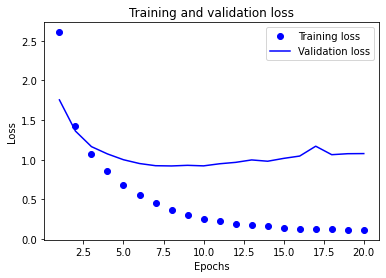

In [0]:
# plotting loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

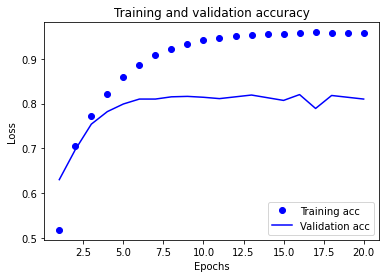

In [0]:
# plotting accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 45ms/step - loss: 2.5259 - accuracy: 0.5243 - val_loss: 1.6883 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.3667 - accuracy: 0.7115 - val_loss: 1.2800 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0088 - accuracy: 0.7869 - val_loss: 1.1037 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 0.7929 - accuracy: 0.8326 - val_loss: 1.0195 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6277 - accuracy: 0.8646 - val_loss: 0.9515 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 40ms/step - loss: 0.5019 - accuracy: 0.8931 - val_loss: 0.9159 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4069 - accuracy: 0.9127 - val_loss: 0.8905 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [0]:
results

[1.0271613597869873, 0.7818343639373779]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

### 3.5.5 Generating predictions on new data


In [0]:
predictions = model.predict(x_test)
print(predictions[0].shape)  # Each entry in predictions is a vector of length 46
print(np.sum(predictions[0]))  # The coefficients in this vector sum to 1
print(np.argmax(predictions[0]))  # the class with the highest probability

(46,)
0.9999999
3


### 3.5.6 A different way to handle the labels and the loss
We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:
```Python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```
The only thing this approach would change is the choice of the loss function. The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_crossentropy:
```Python
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
```
This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

### 3.5.7 The importance of having sufficiently large intermediate layers
We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 3.0636 - accuracy: 0.2289 - val_loss: 2.2262 - val_accuracy: 0.5890
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7328 - accuracy: 0.6094 - val_loss: 1.5524 - val_accuracy: 0.6200
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3304 - accuracy: 0.6438 - val_loss: 1.4058 - val_accuracy: 0.6600
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1364 - accuracy: 0.7189 - val_loss: 1.3228 - val_accuracy: 0.6980
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9971 - accuracy: 0.7560 - val_loss: 1.3019 - val_accuracy: 0.7040
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9063 - accuracy: 0.7759 - val_loss: 1.2839 - val_accuracy: 0.7100
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.8302 - accuracy: 0.7922 - val_loss: 1.3137 - val_accuracy: 0.7140
Epoch 8/20
63

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these eight-dimensional representations, but not all of it.

### 3.5.8 Further experiments
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

### 3.5.9 Wrapping up
Here’s what you should take away from this example:
* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end
with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
    * Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    * Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

## 3.6: Predicting house prices: a regression example
The two previous examples were considered classification problems, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is regression, which consists of predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.

In [0]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
print(f"train_data.shape - {train_data.shape}")
print(f"train_targets.shape - {train_targets.shape}")
print(f"test_data.shape - {test_data.shape}")
print(f"test_targets.shape - {test_targets.shape}")

train_data.shape - (404, 13)
train_targets.shape - (404,)
test_data.shape - (102, 13)
test_targets.shape - (102,)


### 3.6.2 Preparing Data
It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do ***feature-wise normalization***: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.

In [0]:
# normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 3.6.3 Network Building
Because so few samples are available, you’ll use a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [0]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range. <br>
Note that you compile the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems. <br>
You’re also monitoring a new metric during training: mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

### 3.6.4 Validating approach - K-fold cross validation
To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). <br>
As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model. <br>
The best practice in such situations is to use K-fold cross-validation.
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. 

In [0]:
# k-fold Validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


In [0]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                               axis=0)
    model = build_model()  # builds already compiled Keras model
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0) # verbose=0, silent training
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # executes model on validation data
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
print(all_scores)
print(np.mean(all_scores))

[2.4295401573181152, 2.624871253967285, 2.680267572402954, 2.6609487533569336]
2.598906934261322


The different runs do indeed show rather different validation scores, from 2.6 to 3.2. The average (3.0) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by \$3,000 on average, which is significant considering that the prices range from \$10,000 to \$50,000. <br>
Let’s try training the network a bit longer: 500 epochs. To keep a record of how
well the model does at each epoch, you’ll modify the training loop to save the perepoch validation score log.

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
             axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_mae_histories = np.array(all_mae_histories)
means = np.mean(all_mae_histories, axis=1)
print(f"all_mae_histories.shape - {all_mae_histories.shape}")
print(f"all_mae_histories - {all_mae_histories}")
print(f"Folds mean - {means}")
print(f"Mean - {np.mean(means)}")
print(f"min mean - {min(means)} max mean - {max(means)}")

all_mae_histories.shape - (4, 500)
all_mae_histories - [[3.42804313 2.99626517 2.74303174 ... 2.9372735  2.63028169 2.59671378]
 [3.98504734 3.42295146 2.90244794 ... 2.85812044 2.90317678 2.9237082 ]
 [4.25505924 3.47846103 2.95104766 ... 2.6506505  2.77888846 2.78795624]
 [5.8587575  4.39013004 3.57936478 ... 2.58881545 2.3849194  2.46267104]]
Folds mean - [2.52431315 2.75878005 2.66234418 2.60975883]
Mean - 2.6387990544438362
min mean - 2.5243131511211394 max mean - 2.758780049800873


You can then compute the average of the per-epoch MAE scores for all folds.

In [0]:
# building history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

[4.381726801395416, 3.571951925754547, 3.0439730286598206, 2.956299662590027, 2.7996751070022583, 2.8159831762313843, 2.722850501537323, 2.596835434436798, 2.582529067993164, 2.613962471485138, 2.4490526914596558, 2.5692070722579956, 2.492866635322571, 2.4477294087409973, 2.4394072890281677, 2.3844765722751617, 2.390357881784439, 2.444999635219574, 2.399007737636566, 2.4929022192955017, 2.367390513420105, 2.3354972898960114, 2.4133913218975067, 2.372075915336609, 2.4502455592155457, 2.497211754322052, 2.406658411026001, 2.2699044346809387, 2.4189616441726685, 2.3015234172344208, 2.2936081290245056, 2.3664762377738953, 2.300524652004242, 2.375088334083557, 2.3062363862991333, 2.2821010053157806, 2.287057012319565, 2.2911176085472107, 2.3008234202861786, 2.338841438293457, 2.378071427345276, 2.42635715007782, 2.375572443008423, 2.3753488659858704, 2.3118168115615845, 2.250074952840805, 2.4365915060043335, 2.220617264509201, 2.2544577717781067, 2.336818188428879, 2.304809182882309, 2.2988

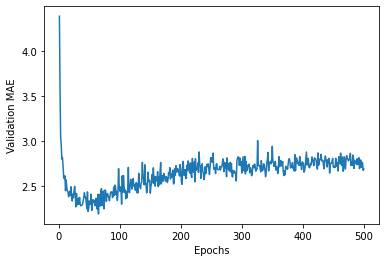

In [0]:
# plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. Let’s do the following:
* Omit the first 10 data points, which are on a different scale than the rest of the curve. 
* Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

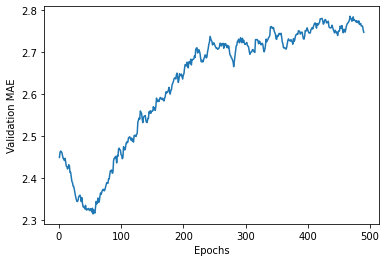

In [0]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after around 80 epochs. Past that point, you start overfitting. <br>
Once you’re finished tuning other parameters of the model (in addition to the
number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [0]:
# training final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 38.8515 - mae: 2.7172
2.71720552444458


### 3.6.5 Wrapping up
Here’s what you should take away from this example:
* Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.
* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
* When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.